['5' '0' '4' ... '4' '5' '6']
[0. 0. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]


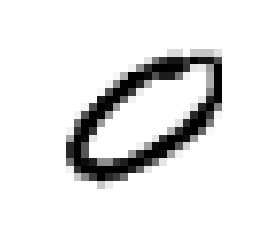

[1.]
Epoch 0 cost:  0.8286808116866502
Epoch 1 cost:  0.7100868316593337
Epoch 2 cost:  0.5036219138883394
Epoch 3 cost:  0.4503539922471634
Epoch 4 cost:  0.41650976330319817
Epoch 5 cost:  0.3875672769513326
Epoch 6 cost:  0.36251468760329775
Epoch 7 cost:  0.3406832695092806
Epoch 8 cost:  0.3215622242279372
Epoch 9 cost:  0.30473761079527345
Final cost: 0.30473761079527345
[[0.00533138 0.01803599 0.03081739 ... 0.00032106 0.01159439 0.11315878]]
[[0. 0. 0. ... 0. 0. 0.]]
[False False False ... False False False]
[False False False ... False False False]
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      9020
        True       0.45      0.35      0.40       980

    accuracy                           0.89     10000
   macro avg       0.69      0.65      0.67     10000
weighted avg       0.88      0.89      0.89     10000



In [53]:
#binary classification if digit =0 assign it as 1, else 0
from sklearn.datasets import*
import matplotlib.pyplot as plt
X,y = fetch_openml('mnist_784', version = 1, return_X_y=True)
print(y)
X = X / 255

import numpy as np

y_new = np.zeros(y.shape)
print(y_new)
y_new[np.where(y == '0')[0]] = 1
y = y_new
print(y_new)

m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]



i = 1
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])


def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h)
b2 = np.zeros((1, 1))

for i in range(10):

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = compute_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)
print(A2)
print(y_test)
predictions = (A2>.5)[0,:]
labels = (y_test == 1)[0,:]
print(predictions)
print(labels)
from sklearn.metrics import*
print(classification_report(labels,predictions))

#print(confusion_matrix(predictions, labels))
#print(classification_report(predictions, labels))

